In [1]:
#function to print 5 rows
def five_rows(table):
    count = 0
    
    if type(table) == dict:
        for row in table:
            count += 1 
            print(row,table[row])
            if count == 5:
                break
    else:
        for row in table:
            count += 1 
            print(row)
            if count == 5:
                break
                
def print_line(dot=False):
    if dot == True:
        print('---------------------------')
    else:
        print('___________________________')

In [2]:
#Quiz: Subway data: taking a look at the data
import pandas as pd

subway_weather = pd.read_csv('nyc_subway_weather.csv')

five_rows(subway_weather)

UNIT
DATEn
TIMEn
ENTRIESn
EXITSn


In [3]:
subway_weather[1:5]

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


**Quiz: Subway data, my questions**

1. How much does precipitation affect ridership?
2. How does temperature affect ridership?
3. Is there a threshold for temperature and/or precipitation where ridership is drastically increased?
4. When adjusting for other variables, does wind still affect ridership?
5. Are the results for the questions above consistent across all stations?

**Quiz: Subway data, instructor's questions**
1. What variables are related to subway ridership?
    - a. Which stations have the most riders?
    - b. What are the ridership patterns over time?
    - c. How does the weather affect ridership?
2. What patterns can I find in the weather?
    - a. Is the temperature rising throughout the month (May)?
    - b. How does weather vary across the city?

**Two-dimensional data**

- Rows and columns
- Python: list of lists
- NumPy: 2D array
    - 2D arrays, as opposed to arrays of arrays:
        - More memory efficient
        - Accessing elements is a bit different
            - 2D array: a[1,3]  array of arrays: a[1][3]
                - row 1, column 3
                - can also use slice, e.g. a[1:4,3:5]
                - mean(), std(), etc. operate on entire array
- Pandas: DataFrame

In [4]:
#Two-Dimensional NumPy Arrays, example code
import numpy as np

# Subway ridership for 5 stations on 10 different days
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

# Change False to True for each block of code to see what it does

# Accessing elements
if False:
    print(ridership[1, 3])
    print(ridership[1:3, 3:5])
    print(ridership[1, :])
    
# Vectorized operations on rows or columns
if False:
    print(ridership[0, :] + ridership[1, :])
    print(ridership[:, 0] + ridership[:, 1])
    
# Vectorized operations on entire arrays
if False:
    a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    b = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
    print(a + b)



In [5]:
#Quiz: Two-Dimensional NumPy Arrays

def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    Hint: NumPy's argmax() function might be useful:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html
    '''
    overall_mean = ridership.mean() # Replace this with your code
    mean_for_max = ridership[:,np.argmax(ridership[0])].mean() # Replace this with your code
    
    return (overall_mean, mean_for_max)

In [6]:
mean_riders_for_max_station(ridership)

(2342.5999999999999, 3239.9000000000001)

In [7]:
#Quiz: Two-Dimensional NumPy Arrays, instructor's solution

def mean_riders_for_max_station(ridership):

    max_station = ridership[0, :].argmax()
    
    overall_mean = ridership.mean() # Replace this with your code
    mean_for_max = ridership[:, max_station].mean() # Replace this with your code
    
    return (overall_mean, mean_for_max)

Operations along an axis

- Most functions built into numpy takes an axis argument
    - column: axis=0
    - row: axis=1

In [8]:
#Numpy Axis, example code

import numpy as np

# Change False to True for this block of code to see what it does

# NumPy axis argument
if False:
    a = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]
    ])
    
    print(a.sum())
    print(a.sum(axis=0))
    print(a.sum(axis=1))
    


In [9]:
#Quiz: NumPy Axis
# Subway ridership for 5 stations on 10 different days
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

def min_and_max_riders_per_day(ridership):
    '''
    Fill in this function. First, for each subway station, calculate the
    mean ridership per day. Then, out of all the subway stations, return the
    maximum and minimum of these values. That is, find the maximum
    mean-ridership-per-day and the minimum mean-ridership-per-day for any
    subway station.
    '''
    
    mean_ridership_per_station = ridership.mean(axis=0)
    
    max_daily_ridership = mean_ridership_per_station.max()     # Replace this with your code
    min_daily_ridership = mean_ridership_per_station.min()     # Replace this with your code
    
    return (max_daily_ridership, min_daily_ridership)

In [10]:
min_and_max_riders_per_day(ridership)

(3239.9000000000001, 1071.2)

Instructor has same exact solution.

**Numpy and Pandas Data Types**

- NumPy 
    - each element in the array is expected to have the same array
        - including 2D arrays
            - makes it inconvenient to import CSVs
- Pandas
    - DataFrame
        - 2D data structure
        - each column is assumed to be a different type
        - have indexes, like pandas series.
            - Index=rows, name=columns

In [11]:
#Pandas Data Types example

enrollments_df = pd.DataFrame({
        'account_key': [448,448,448,448,448],
        'status': ['canceled','canceled','canceled','canceled','current'],
        'join_date:': ['2014-11-10','2014-11-05','2015-01-27','2014-11-10','2014-11-10'],
        'days_to_cancel': [65,5,0,0,np.nan],
        'is_udacity': [True,True,True,True,True]
    })

enrollments_df

,account_key,days_to_cancel,is_udacity,join_date:,status
0,448,65.0,True,2014-11-10,canceled
1,448,5.0,True,2014-11-05,canceled
2,448,0.0,True,2015-01-27,canceled
3,448,0.0,True,2014-11-10,canceled
4,448,NaN,True,2014-11-10,current


In [12]:
#Pandas Data Types example

enrollments_df.mean()
#Takes the mean of the numeric columns and ignores the others. 
#With 2D numpy arrays, this would fail, as not all columns are numeric.

account_key       448.0
days_to_cancel     17.5
is_udacity          1.0
dtype: float64

**Accessing elements of a DataFrame**

- Accessing a single row of a DataFrame is similar to accessing a single row of a Series
    - `ridership_df.loc['05-02-11'] #05-02-11 is index entry (row)`
- Single rows can also be accessed by position, using iloc
    - `ridership_df.iloc[9] #returns row 9 (row 10, since starts at 0)`
- To access a single element (single cell) can also be accessed using loc or iloc
    - `ridership_df.loc['05-02-11', 'R004'] #05-02-11 is index entry, R004 is name (column header)`
    - `ridership_df.iloc[0, 3] #0 is row, 3 is column`
- Columns can be accessed using square brackets []
    - `ridership_df['R006']`
- To return only values (as numpy array?):
    - `ridership_df.values`
    - example use case: if you want to find the mean of all columns
        - `ridership_df.values.mean()`
        - be careful of data types if doing this
 

In [13]:
#Accessing elements of a DataFrame, code example

# Subway ridership for 5 stations on 10 different days
ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)

# Change False to True for each block of code to see what it does

# DataFrame creation
if False:
    # You can create a DataFrame out of a dictionary mapping column names to values
    df_1 = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5]})
    print(df_1)

    # You can also use a list of lists or a 2D NumPy array
    df_2 = pd.DataFrame([[0, 1, 2], [3, 4, 5]], columns=['A', 'B', 'C'])
    print(df_2)
   

# Accessing elements
if False:
    print(ridership_df.iloc[0])
    print(ridership_df.loc['05-05-11'])
    print(ridership_df['R003'])
    print(ridership_df.iloc[1, 3])
    
# Accessing multiple rows
if False:
    print(ridership_df.iloc[1:4])
    
# Accessing multiple columns
if False:
    print(ridership_df[['R003', 'R005']])
    
# Pandas axis
if False:
    df = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5]})
    print(df.sum())
    print(df.sum(axis=1))
    print(df.values.sum())
    

In [14]:
ridership_df.iloc[0].argmax()

'R006'

In [15]:
#Quiz: Accessing elements of a DataFrame
def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    This is the same as a previous exercise, but this time the
    input is a Pandas DataFrame rather than a 2D NumPy array.
    '''
    max_Station = ridership.iloc[0].argmax()
    
    overall_mean = ridership.values.mean() # Replace this with your code
    mean_for_max = ridership[max_Station].mean() # Replace this with your code
    
    return (overall_mean, mean_for_max)

mean_riders_for_max_station(ridership_df)

(2342.5999999999999, 3239.9)

**Loading data into a Dataframe** 

 df.readcsv()

- Useful functions for viewing data:
    - `subway_df.head() #first rows`

In [16]:
#Quiz: calculating Correlation (Pearson's r)
'''
1. Start by standarizing:
    - convert to standard deviations below/above mean
2. Multiply each pair of values, and take the average
r = (average of x in std units) * (average of y in std units)
    - Ranges from -1 to +1
    - if positive value, both x and y increases or decreases
    - if negative value, one of x or y decreases as the other increases
    - Pearson's r only measures linear correlation! 

df.std()
- pass argument ddof=0 to ensure Bessel's correction is not used (used by default)

Pearson's r in NumPy
- NumPy's corrcoef() function can be used to calculate Pearson's r, also known as the correlation coefficient.


'''
filename = 'nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

def correlation(x, y):
    '''
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
    
    correlation = average of (x in standard units) times (y in standard units)
    
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''
    x_std = (x - x.mean()) / x.std(ddof=0)
    y_std = (y - y.mean()) / y.std(ddof=0)
    
    return (x_std * y_std).mean()

entries = subway_df['ENTRIESn_hourly']
cum_entries = subway_df['ENTRIESn']
rain = subway_df['meanprecipi']
temp = subway_df['meantempi']

print(correlation(entries, rain))
print(correlation(entries, temp))
print(correlation(rain, temp))

print(correlation(entries, cum_entries))



0.03564851577223041
-0.026693348321569912
-0.22903432340833663
0.5858954707662182


I struggled with this one. In the end I had to view parts of the answer video to get on track.

My mistake was that I had used 
~~~~
return x_std.mean() * y_std.mean()
~~~~
instead of the correct answer
~~~~
return (x_std * y_std).mean()
~~~~

**Pandas Axis Names**

Instead of `axis=0` or `axis=1` you can use `axis='index'` or `axis='columns'`
- axis='columns'
    - df.mean(axis='columns') gives the mean of each row
        - the idea is that you're taking the mean along the column
- axis='index'
    - df.mean(axis='index') gives the mean of each column
        - You're taking the mean along the index (the rows)


**DataFrame Vectorized Operations**

- Similar to vectorized operations for 2D Numpy Arrays
    - Match up elements by index and column name rather than position

In [17]:
#DataFrame Vectorized Operations, examples

# Change False to True for each block of code to see what it does

# Adding DataFrames with the column names
if False:
    df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
    df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]})
    print(df1 + df2)
    
# Adding DataFrames with overlapping column names 
if False:
    df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
    df2 = pd.DataFrame({'d': [10, 20, 30], 'c': [40, 50, 60], 'b': [70, 80, 90]})
    print(df1 + df2)

# Adding DataFrames with overlapping row indexes
if True:
    df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]},
                       index=['row1', 'row2', 'row3'])
    df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]},
                       index=['row4', 'row3', 'row2'])
    print(df1 + df2)
    


         a     b     c
row1   NaN   NaN   NaN
row2  32.0  65.0  98.0
row3  23.0  56.0  89.0
row4   NaN   NaN   NaN


In [18]:
#Quiz: DataFrame Vectorized Operations

# Cumulative entries and exits for one station for a few hours
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})

def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) and
    return a DataFrame with hourly entries and exits (entries in the
    first column, exits in the second).
    '''
    entries_column = entries_and_exits[entries_and_exits.columns[0]]
    exits_column = entries_and_exits[entries_and_exits.columns[0]]
    
    
    
    #entries_minus_exits = entries_and_exits[entries_column] - entries_and_exits[exits_column]
    entries = entries_and_exits
    
    return entries_and_exits - entries_and_exits.shift(1)

get_hourly_entries_and_exits(entries_and_exits)

,ENTRIESn,EXITSn
0,NaN,NaN
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


**Non-built-in finctions for DataFrame**

- **applymap**
    - Functions as apply for series

In [19]:
#DataFrame applymap(), code example

# Change False to True for this block of code to see what it does

# DataFrame applymap()
if True:
    df = pd.DataFrame({
        'a': [1, 2, 3],
        'b': [10, 20, 30],
        'c': [5, 10, 15]
    })
    
    def add_one(x):
        return x + 1
        
    print(df.applymap(add_one))


   a   b   c
0  2  11   6
1  3  21  11
2  4  31  16


In [20]:
#Quiz: DataFrame applymap()

grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

def convert_grades(grades):
    '''
    Fill in this function to convert the given DataFrame of numerical
    grades to letter grades. Return a new DataFrame with the converted
    grade.
    
    The conversion rule is:
        90-100 -> A
        80-89  -> B
        70-79  -> C
        60-69  -> D
        0-59   -> F
    '''
    def convert_grade(grades):
        if grades >= 90 and grades <= 100:
            return "A"
        elif grades >= 80 and grades <= 89:
            return "B"
        elif grades >= 70 and grades <= 79:
            return "C"
        elif grades >= 60 and grades <= 69:
            return "D"
        elif grades >= 0 and grades <= 59:
            return "F"
        
    return grades.applymap(convert_grade)

convert_grades(grades_df)

,exam1,exam2
Andre,F,F
Barry,B,D
Chris,C,F
Dan,C,F
Emilio,B,D
Fred,C,F
Greta,A,C
Humbert,D,F
Ivan,A,C
James,B,D


**DataFrame apply()**

- df.apply()
    - takes in an entire column of a dataframe (a series), and returns a new pandas Series
    - df.apply(f) calls the function on each column of the DataFrame
    - Why use apply() instead of applymap()?
        - operation you want to do to each element of the df might depend on the entire column
        - example: Give A to 20%, B to 30%, C to 30%, D to 10%, F to 10%
            - Need to take whole column into account, to find out which percentile a single element (score) belongs to
    - Takes axis argument, so can do apply on row instead of column

In [21]:
#DataFrame apply() example

grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

# Change False to True for this block of code to see what it does

# DataFrame apply()
if True:
    def convert_grades_curve(exam_grades):
        # Pandas has a bult-in function that will perform this calculation
        # This will give the bottom 0% to 10% of students the grade 'F',
        # 10% to 20% the grade 'D', and so on. You can read more about
        # the qcut() function here:
        # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
        return pd.qcut(exam_grades,
                       [0, 0.1, 0.2, 0.5, 0.8, 1],
                       labels=['F', 'D', 'C', 'B', 'A'])
        
    # qcut() operates on a list, array, or Series. This is the
    # result of running the function on a single column of the
    # DataFrame.
    print(convert_grades_curve(grades_df['exam1']))
    
    # qcut() does not work on DataFrames, but we can use apply()
    # to call the function on each column separately
    print(grades_df.apply(convert_grades_curve))
    


Andre      F
Barry      B
Chris      C
Dan        C
Emilio     B
Fred       C
Greta      A
Humbert    D
Ivan       A
James      B
Name: exam1, dtype: category
Categories (5, object): [F < D < C < B < A]
        exam1 exam2
Andre       F     F
Barry       B     B
Chris       C     C
Dan         C     C
Emilio      B     B
Fred        C     C
Greta       A     A
Humbert     D     D
Ivan        A     A
James       B     B


In [22]:
#Quiz: DataFrame apply()
def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    '''
    
    std_dev = df.std(ddof=0)
    average = df.mean()
    
    standardized = (df - average) / std_dev
    
    return standardized
    


In [23]:
grades_df.apply(standardize)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


I reused the code used for standardizing a numpy array, and it worked fine. However, that doesn't use grades_df.apply, so I will write the instructors additional function below.

In [24]:
def standardize_inst(df):
    return df.apply(standardize)

**DataFrame apply() 2nd use case**

- Instead of taking in one column and returning a second column, function f can return a single value
    - e.g. df.apply(np.max)
        - same as built-in function df.max()




In [25]:
#DataFrame apply() Use Case 2, code example

df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})

# Change False to True for this block of code to see what it does

# DataFrame apply() - use case 2
if True:   
    print(df.apply(np.mean))
    print(df.apply(np.max))
    

a     3.0
b    30.0
c    15.0
dtype: float64
a     5
b    50
c    25
dtype: int64


In [26]:
max_num = df['a'].max()

pd_series = pd.Series([1])

blah = pd.Series([1,2,3])

for i in df['a']:
    if i != max_num:
        print(i)
        pd_series = pd_series.append(pd.Series([i]))

pd_series.max()

4
3
1
2


4

In [27]:
#Quiz: DataFrame apply() Use Case 2

def series_second_largest(column):
    '''
    Fill in this function to return the second-largest value of each 
    column of the input DataFrame.
    '''
    max_num = column.max()
    
    s = pd.Series()
    
    for i in column:
        if i != max_num:
            s = s.append(pd.Series([i]))

    return s.max()
    
def second_largest(df):
    return df.apply(series_second_largest)
    
second_largest(df)

a     4
b    40
c    20
dtype: int64

In [28]:
pd_series.iloc[1]

4

The instructor chose another method for finding second largest in a series, namely sort. My intepretation of her implementation below.

In [29]:
def second_largest_in_column(series):
    s = series.sort_values(ascending=False)
    return s.iloc[1]

In [30]:
second_largest_in_column(df['a'])

4

In [31]:
# Adding a Series to a one-column DataFrame
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({0: [10, 20, 30, 40]})
    
    print(df)
    print('') # Create a blank line between outputs
    print(df + s)

    0
0  10
1  20
2  30
3  40

    0   1   2   3
0  11 NaN NaN NaN
1  21 NaN NaN NaN
2  31 NaN NaN NaN
3  41 NaN NaN NaN


In [32]:
#Quiz: adding a DataFrame to a Series

# Change False to True for each block of code to see what it does

# Adding a Series to a square DataFrame
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print(df)
    print('') # Create a blank line between outputs
    print(df + s)
    
# Adding a Series to a one-row DataFrame 
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({0: [10], 1: [20], 2: [30], 3: [40]})
    
    print(df)
    print('') # Create a blank line between outputs
    print(df + s)

# Adding a Series to a one-column DataFrame
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({0: [10, 20, 30, 40]})
    
    print(df)
    print('') # Create a blank line between outputs
    print(df + s)
    

    
# Adding when DataFrame column names match Series index
if False:
    s = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
    
    print(df)
    print('') # Create a blank line between outputs
    print(df + s)
    
# Adding when DataFrame column names don't match Series index
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
    
    print(df)
    print('') # Create a blank line between outputs
    print(df + s)

In [33]:
#More examples of adding df to s


# Adding using +
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print(df)
    print('') # Create a blank line between outputs
    print(df + s)
    
# Adding with axis='index'
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print(df)
    print('') # Create a blank line between outputs
    print(df.add(s, axis='index'))
    # The functions sub(), mul(), and div() work similarly to add()
    
# Adding with axis='columns'
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print(df)
    print('') # Create a blank line between outputs
    print(df.add(s, axis='columns'))
    # The functions sub(), mul(), and div() work similarly to add()

In [34]:
std_dev = grades_df.std()
average = grades_df.mean()

standarized_df = (grades_df - average) / std_dev

standarized_df

,exam1,exam2
Andre,-2.196525,-2.186335
Barry,0.208891,0.366571
Chris,0.018990,-0.091643
Dan,-0.170911,-0.091643
Emilio,0.715295,0.628408
Fred,-0.487413,-0.418938
Greta,0.841896,1.413917
Humbert,-0.803916,-0.746234
Ivan,1.284999,0.955703
James,0.588694,0.170194


In [35]:
len(grades_df.columns)

columns_df = grades_df

for column in grades_df.columns:
    std_dev = grades_df[column].std()
    average = grades_df[column].mean()
    
    standardized_col = (grades_df[column] - average) / std_dev
        
    columns_df[column] = standardized_col



columns_df

,exam1,exam2
Andre,-2.196525,-2.186335
Barry,0.208891,0.366571
Chris,0.018990,-0.091643
Dan,-0.170911,-0.091643
Emilio,0.715295,0.628408
Fred,-0.487413,-0.418938
Greta,0.841896,1.413917
Humbert,-0.803916,-0.746234
Ivan,1.284999,0.955703
James,0.588694,0.170194


In [36]:
grades_df.columns.get_loc('exam2')

1

In [37]:
#Quiz: Standarizing each column again
    
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    
    This time, try to use vectorized operations instead of apply().
    You should get the same results as you did before.
    '''
    
    std_dev = df.std(ddof=0)
    average = df.mean()

    standarized_df = (df - average) / std_dev
    
    return standarized_df


In [38]:
standardize(grades_df)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


In [39]:
#Quiz (optional): Standarizing each row

def standardize_rows(df):
    '''
    Optional: Fill in this function to standardize each row of the given
    DataFrame. Again, try not to use apply().
    
    This one is more challenging than standardizing each column!
    '''
    
    std_dev = df.std(ddof=0,axis=1)
    average = df.mean(axis=1)
    mean_diff = df.sub(average,axis='index')

    standarized_df = mean_diff.div(std_dev,axis='index')
    
    return standarized_df

In [40]:
standardize_rows(grades_df)

,exam1,exam2
Andre,1.0,-1.0
Barry,1.0,-1.0
Chris,1.0,-1.0
Dan,1.0,-1.0
Emilio,1.0,-1.0
Fred,1.0,-1.0
Greta,1.0,-1.0
Humbert,1.0,-1.0
Ivan,1.0,-1.0
James,1.0,-1.0


I had to see the instructior's solution to solve this.

**Pandas groupby()**


groupby()
Se video for oversiktlig demonstrasjon:
https://classroom.udacity.com/nanodegrees/nd002/parts/0021345403/modules/317671873575460/lessons/5428018709/concepts/54422618020923



In [41]:
enrollments_df

,account_key,days_to_cancel,is_udacity,join_date:,status
0,448,65.0,True,2014-11-10,canceled
1,448,5.0,True,2014-11-05,canceled
2,448,0.0,True,2015-01-27,canceled
3,448,0.0,True,2014-11-10,canceled
4,448,NaN,True,2014-11-10,current


In [42]:
enrollments_df.groupby('account_key')['days_to_cancel']#.mean()#['days_to_cancel']

In [43]:
#Pandas groupby() code examples
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

# Change False to True for each block of code to see what it does

# Examine DataFrame
if False:
    print(example_df)
    
# Examine groups
if False:
    grouped_data = example_df.groupby('even')
    # The groups attribute is a dictionary mapping keys to lists of row indexes
    print(grouped_data.groups)
    
# Group by multiple columns
if False:
    grouped_data = example_df.groupby(['even', 'above_three'])
    print(grouped_data.groups)
    
# Get sum of each group
if True:
    grouped_data = example_df.groupby('even')
    print(grouped_data.sum())
    
# Limit columns in result
if True:
    grouped_data = example_df.groupby('even')
    
    # You can take one or more columns from the result DataFrame
    print(grouped_data.sum()['value'])
    
    print('\n') # Blank line to separate results
    
    # You can also take a subset of columns from the grouped data before 
    # collapsing to a DataFrame. In this case, the result is the same.
    print(grouped_data['value'].sum())
    


       above_three  value
even                     
False          0.0      5
True           3.0     16
even
False     5
True     16
Name: value, dtype: int64


even
False     5
True     16
Name: value, dtype: int64


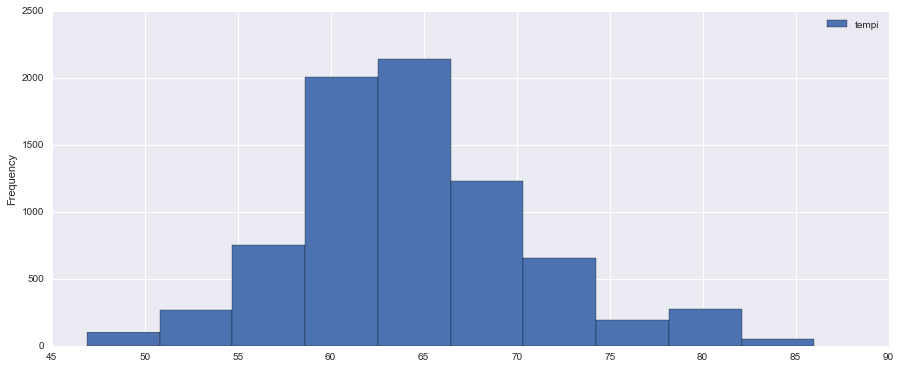

In [44]:
#Quiz: Pandas groupby() function

filename = 'nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

### Write code here to group the subway data by a variable of your choice, then
### either print out the mean ridership within each group or create a plot.

#temp_group = subway_df.groupby('tempi')
temp_group = subway_df.groupby('ENTRIESn_hourly')

temp_count = subway_df['tempi'].value_counts().sort_index()
#temp_count = subway_df['ENTRIESn_hourly'].value_counts().sort_index()


mean_riders = subway_df['ENTRIESn_hourly'].mean()

#print(mean_riders)

#temp_group.mean()['ENTRIESn_hourly'].plot(kind='bar',figsize=(15,6),legend=True)
temp_group.mean()['tempi'].plot(kind='hist',figsize=(15,6),legend=True)


#temp_count



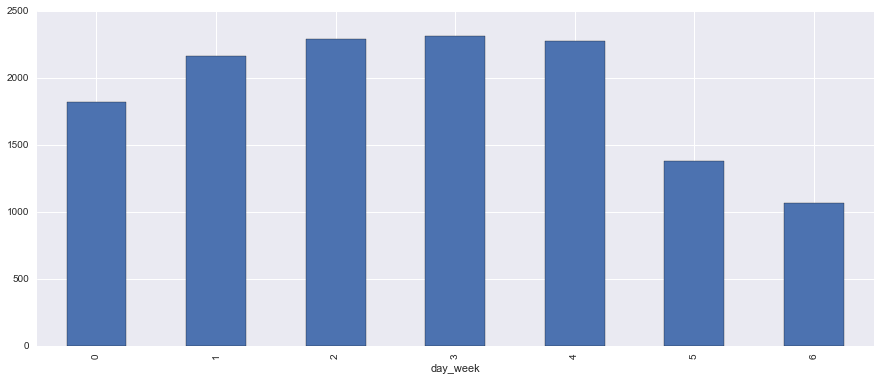

In [45]:
#Quiz: Pandas groupby() function

filename = 'nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

### Write code here to group the subway data by a variable of your choice, then
### either print out the mean ridership within each group or create a plot.

#temp_group = subway_df.groupby('ENTRIESn_hourly')
temp_group = subway_df.groupby('day_week')

temp_count = subway_df['tempi'].value_counts().sort_index()
#temp_count = subway_df['ENTRIESn_hourly'].value_counts().sort_index()


mean_riders = subway_df['ENTRIESn_hourly'].mean()

#print(mean_riders)

#temp_group.mean()['day_week'].plot(kind='hist',figsize=(15,6),legend=True,bins=7)
temp_group.mean()['ENTRIESn_hourly'].plot(figsize=(15,6),kind='bar')


#temp_count



In [46]:
#More groupby examples:functions

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

# Change False to True for each block of code to see what it does

# Standardize each group
if False:
    def standardize(xs):
        return (xs - xs.mean()) / xs.std()
    grouped_data = example_df.groupby('even')
    print(grouped_data['value'].apply(standardize)) 
    
# Find second largest value in each group
if True:
    def second_largest(xs):
        sorted_xs = xs.sort(inplace=False, ascending=False)
        return sorted_xs.iloc[1]
    grouped_data = example_df.groupby('even')
    print(grouped_data['value'].apply(second_largest))

print(grouped_data.groups)

even
False    1
True     4
Name: value, dtype: int64
{False: ['a', 'b', 'e'], True: ['c', 'd', 'f', 'g']}


/Users/ggaasemyr/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:22: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


In [47]:
#Quiz: DataFrame Vectorized Operations

# Cumulative entries and exits for one station for a few hours
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})

def hourly_for_group(entries_and_exits):    
    return entries_and_exits - entries_and_exits.shift(1)

#get_hourly_entries_and_exits(entries_and_exits)

In [48]:
#Quiz: Calculating hourly entries and exits

ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})

def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits and return a DataFrame with hourly entries and exits.
    The hourly entries and exits should be calculated separately for
    each station (the 'UNIT' column).
    '''
    
    new_df = pd.DataFrame()
    #new_df = new_df.append(entries_and_exits)
        
    stations = entries_and_exits.groupby('UNIT')
    
    new_df['ENTRIESn'] = stations['ENTRIESn'].apply(hourly_for_group)
    new_df['EXITSn'] = stations['EXITSn'].apply(hourly_for_group)
    

    
    return new_df

I misunderstood this quiz a little bit. they only wanted the Entries and exits column returned, for some reason. I commented out my initial solution.

In [49]:
#Instructor's solution to Calculating hourly entries and exits

def get_hourly_entries_and_exits(entries_and_exits):
    return entries_and_exits.groupby('UNIT')['ENTRIESn','EXITSn'].apply(hourly_for_group)

#Quite shorter, I wasn't aware I could do multiple columns at once.

In [50]:
entries_and_exits = pd.DataFrame(
    {'ENTRIESn': [10, 40, 60, 65, 85],
     'EXITSn': [0, 10, 20, 60, 60],
     'UNIT': ['R001', 'R001', 'R001', 'R001', 'R001']},
    index=[0, 1, 2, 3, 4]
)

In [51]:
get_hourly_entries_and_exits(entries_and_exits)

,ENTRIESn,EXITSn
0,NaN,NaN
1,30.0,10.0
2,20.0,10.0
3,5.0,40.0
4,20.0,0.0


**Combining Pandas DataFrames (using merge() )**

- Pandas merge() function
    - combines two tables into a new table with all the columns (so SQL JOIN)
    - duplicates should be removed first (depending on use case)
    - example: `submissions.merge(enrollments, on='account_key', how='left')`
        -options for how: inner, right, left, outer
            - inner is default
       

In [52]:
#Quiz: Combining Pandas DataFrames


import pandas as pd

subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})



def combine_dfs(subway_df, weather_df):
    '''
    Fill in this function to take 2 DataFrames, one with subway data and one with weather data,
    and return a single dataframe with one row for each date, hour, and location. Only include
    times and locations that have both subway data and weather data available.
    '''
    
    return subway_df.merge(
        weather_df, on=['DATEn','hour','latitude','longitude'], how='inner')


In [53]:
combine_dfs(subway_df, weather_df)

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude,fog,pressurei,rain,tempi,wspdi
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564,0,30.24,0,52.0,8.1
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564,0,30.32,0,48.9,6.9
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564,0,30.14,0,54.0,3.5
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564,0,29.98,0,57.2,15.0
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564,0,30.01,0,48.9,15.0
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135,0,30.24,0,52.0,8.1
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135,0,30.32,0,48.9,6.9
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135,0,30.14,0,54.0,3.5
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135,0,29.98,0,57.2,15.0
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135,0,30.01,0,48.9,15.0


In [54]:
#Some groupby examples

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

# Change False to True for this block of code to see what it does

# groupby() without as_index
if False:
    first_even = example_df.groupby('even').first()
    print(first_even)
    print(first_even['even']) # Causes an error. 'even' is no longer a column in the DataFrame
    
# groupby() with as_index=False
if True:
    print(example_df.groupby('even', as_index=False).first())
    print(example_df['even'])# Now 'even' is still a column in the DataFrame



    even above_three  value
0  False       False      1
1   True       False      2
a    False
b    False
c     True
d     True
e    False
f     True
g     True
Name: even, dtype: bool


**Plotting with DataFrames, quiz description**

Just like Pandas Series, DataFrames also have a plot() method. If df is a DataFrame, then df.plot() will produce a line plot with a different colored line for each variable in the DataFrame. This can be a convenient way to get a quick look at your data, especially for small DataFrames, but for more complicated plots you will usually want to use matplotlib directly.

In the following quiz, create a plot of your choice showing something interesting about the New York subway data. For example, you might create:

Histograms of subway ridership on both days with rain and days without rain
A scatterplot of subway stations with latitude and longitude as the x and y axes and ridership as the bubble size
If you choose this option, you may wish to use the as_index=False argument to groupby(). There is example code in the following quiz.
A scatterplot with subway ridership on one axis and precipitation or temperature on the other
If you're not sure how to make the plot you want, try searching on Google or take a look at the matplotlib documentation. Once you've created a plot you're happy with, share what you've found on the forums!

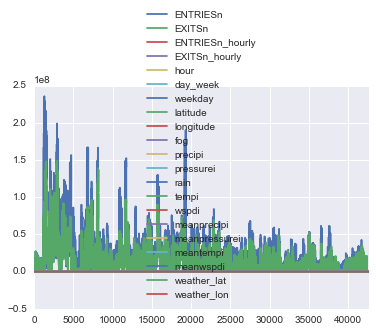

In [55]:
#Quiz: Plotting with DataFrames
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

filename = 'nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

## Make a plot of your choice here showing something interesting about the subway data.
## Matplotlib documentation here: http://matplotlib.org/api/pyplot_api.html
## Once you've got something you're happy with, share it on the forums!

subway_df.plot()

In [56]:
subway_df.columns

Index(['UNIT', 'DATEn', 'TIMEn', 'ENTRIESn', 'EXITSn', 'ENTRIESn_hourly',
       'EXITSn_hourly', 'datetime', 'hour', 'day_week', 'weekday', 'station',
       'latitude', 'longitude', 'conds', 'fog', 'precipi', 'pressurei', 'rain',
       'tempi', 'wspdi', 'meanprecipi', 'meanpressurei', 'meantempi',
       'meanwspdi', 'weather_lat', 'weather_lon'],
      dtype='object')

In [57]:
perci_count = subway_df.groupby('precipi')['UNIT'].agg('count')

In [58]:
perci_count

precipi
0.00    39827
0.01      792
0.02      445
0.03      284
0.05       23
0.06      268
0.07      154
0.08      224
0.15      152
0.21      457
0.30       23
Name: UNIT, dtype: int64

In [59]:
perci_count_standardized = standardize(perci_count)

In [60]:
merged_table = perci_count_standardized.to_frame().merge(
    subway_df,left_index=True,right_on='precipi',suffixes=('perci','sub'))

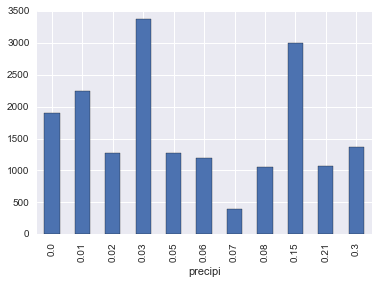

In [61]:
subway_df.groupby('precipi')['ENTRIESn_hourly'].mean().plot(kind='bar')

In [62]:
subway_df.groupby('DATEn')['precipi'].sum()

DATEn
05-01-11     0.00
05-02-11     0.00
05-03-11     0.00
05-04-11    18.27
05-05-11     0.00
05-06-11     0.00
05-07-11     0.00
05-08-11     0.00
05-09-11     0.00
05-10-11     0.00
05-11-11     0.00
05-12-11     0.00
05-13-11     0.00
05-14-11     0.00
05-15-11    20.68
05-16-11     3.76
05-17-11    99.06
05-18-11    40.79
05-19-11     9.30
05-20-11     4.67
05-21-11     0.00
05-22-11     0.00
05-23-11     0.23
05-24-11     0.00
05-25-11     0.00
05-26-11     0.00
05-27-11     0.00
05-28-11     0.00
05-29-11     0.00
05-30-11     0.18
05-31-11     0.00
Name: precipi, dtype: float64

In [63]:
subway_df.groupby('DATEn').agg('count')

,UNIT,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,weekday,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
DATEn,,,,,,,,,,,,,,,,,,,,,
05-01-11,1361,1361,1361,1361,1361,1361,1361,1361,1361,1361,...,1361,1361,1361,1361,1361,1361,1361,1361,1361,1361
05-02-11,1388,1388,1388,1388,1388,1388,1388,1388,1388,1388,...,1388,1388,1388,1388,1388,1388,1388,1388,1388,1388
05-03-11,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,...,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407
05-04-11,1375,1375,1375,1375,1375,1375,1375,1375,1375,1375,...,1375,1375,1375,1375,1375,1375,1375,1375,1375,1375
05-05-11,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,...,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383
05-06-11,1373,1373,1373,1373,1373,1373,1373,1373,1373,1373,...,1373,1373,1373,1373,1373,1373,1373,1373,1373,1373
05-07-11,1339,1339,1339,1339,1339,1339,1339,1339,1339,1339,...,1339,1339,1339,1339,1339,1339,1339,1339,1339,1339
05-08-11,1332,1332,1332,1332,1332,1332,1332,1332,1332,1332,...,1332,1332,1332,1332,1332,1332,1332,1332,1332,1332
05-09-11,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,...,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396


In [64]:
subway_df.groupby('DATEn')['hour'].agg('count')

DATEn
05-01-11    1361
05-02-11    1388
05-03-11    1407
05-04-11    1375
05-05-11    1383
05-06-11    1373
05-07-11    1339
05-08-11    1332
05-09-11    1396
05-10-11    1404
05-11-11    1352
05-12-11    1344
05-13-11    1341
05-14-11    1347
05-15-11    1355
05-16-11    1415
05-17-11    1417
05-18-11    1376
05-19-11    1375
05-20-11    1366
05-21-11    1366
05-22-11    1364
05-23-11    1408
05-24-11    1409
05-25-11    1379
05-26-11    1383
05-27-11    1370
05-28-11    1358
05-29-11    1357
05-30-11    1403
05-31-11    1406
Name: hour, dtype: int64

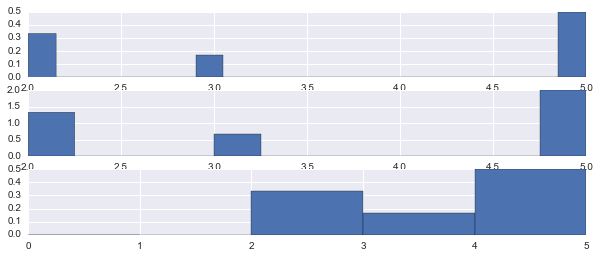

In [65]:
station_count = subway_df.groupby('UNIT')['EXITSn'].agg('count')

#adding weights for normalizing histogram


station_count = pd.Series([5,5,2,2,3,5])

weights = np.ones_like(station_count)/len(station_count)

plt.subplot(3,1,1)
station_count.hist(bins=20,weights=weights,figsize=(10,4))#,cumulative=True)

plt.subplot(3,1,2)
station_count.hist(normed=True,bins=12)#range(len(station_count)))#,cumulative=True)

plt.subplot(3,1,3)
station_count.hist(normed=True,bins=range(len(station_count)))#,cumulative=True)





In [66]:
12

12

**Normalization of histograms (and plots?)**

_Probability density function:_  
From Wikipedia:  
"In probability theory, a probability density function (PDF), or density of a continuous random variable, is a function that describes the relative likelihood for this random variable to take on a given value. The probability of the random variable falling within a particular range of values is given by the integral of this variable’s density over that range—that is, it is given by the area under the density function but above the horizontal axis and between the lowest and greatest values of the range. The probability density function is nonnegative everywhere, and its integral over the entire space is equal to one."

`station_count.hist(normed=True,bins=range(len(station_count)))`

_Probability mass function:_  
Shows the percentage (distribution) of values.  
From Wikipedia:  
"In probability theory and statistics, a probability mass function (pmf) is a function that gives the probability that a discrete random variable is exactly equal to some value.[1] The probability mass function is often the primary means of defining a discrete probability distribution, and such functions exist for either scalar or multivariate random variables whose domain is discrete.  
A probability mass function differs from a probability density function (pdf) in that the latter is associated with continuous rather than discrete random variables; the values of the latter are not probabilities as such: a pdf must be integrated over an interval to yield a probability."

`station_count.hist(bins=20,weights=np.ones_like(station_count)/len(station_count)`

In [67]:
subway_df.groupby(['UNIT','DATEn']).agg('mean')#.hist(bins=20,normed=1,cumulative=True)

ENTRIESn        EXITSn  ENTRIESn_hourly  EXITSn_hourly  \
UNIT DATEn                                                                  
R003 05-01-11  4.388333e+06  2.911002e+06         0.000000       0.000000   
     05-02-11  4.627437e+06  3.071974e+06       246.333333     160.166667   
     05-03-11  4.390648e+06  2.912476e+06       322.600000     217.200000   
     05-04-11  4.392228e+06  2.913535e+06       260.000000     175.166667   
     05-05-11  4.393824e+06  2.914602e+06       321.600000     209.000000   
     05-06-11  4.395424e+06  2.915660e+06       315.200000     205.800000   
     05-07-11  4.192993e+06  2.826342e+06        19.000000      49.200000   
     05-08-11  4.396265e+06  2.916422e+06         0.333333       0.500000   
     05-09-11  4.396953e+06  2.916697e+06       239.666667     142.500000   
     05-10-11  3.213171e+06  2.137671e+06       268.400000     164.800000   
     05-11-11  3.312492e+06  2.279808e+06       313.500000     227.166667   
     05-12-11  3.907601e+06  2.594770e+06       259.833333     177.833333   
     05-13-11  4.587855e+06  2.998288e+06       254.000000     179.000000   
     05-14-11  4.404423e+06  2.921993e+06       154.200000     134.600000   
     05-15-11  4.405087e+06  2.922575e+06       118.000000     102.600000   
     05-16-11  3.911618e+06  2.597783e+06       239.833333     161.500000   
     05-17-11  4.662126e+06  3.087824e+06       246.000000     171.666667   
     05-18-11  3.203614e+06  2.263642e+06       241.600000     186.000000   
     05-19-11  5.004358e+06  3.317107e+06       367.800000     237.200000   
     05-20-11  3.422096e+06  2.276012e+06       260.333333     185.166667   
     05-21-11  4.413319e+06  2.928424e+06       162.800000     143.400000   
     05-22-11  4.414043e+06  2.929027e+06       121.400000      99.200000   
     05-23-11  4.669643e+06  3.093090e+06       237.000000     165.500000   
     05-24-11  4.416515e+06  2.930694e+06       259.000000     177.000000   
     05-25-11  4.417715e+06  2.931567e+06       353.333333     152.000000   
     05-26-11  4.278446e+06  2.758403e+06       339.500000     286.000000   
     05-27-11  4.421181e+06  2.933964e+06       298.800000     204.000000   
     05-28-11  4.422316e+06  2.934874e+06       166.000000     133.400000   
     05-29-11  4.423094e+06  2.935476e+06       141.400000     116.200000   
     05-30-11  4.182561e+06  2.773006e+06       142.000000     101.500000   
...                     ...           ...              ...            ...   
R464 05-02-11  3.983728e+05  8.936467e+04         0.000000       0.000000   
     05-03-11  3.929540e+05  9.123067e+04         0.000000       0.000000   
     05-04-11  4.198940e+05  9.528000e+04         0.000000       0.000000   
     05-05-11  3.983728e+05  8.936467e+04         0.000000       0.000000   
     05-06-11  4.198940e+05  9.528000e+04         0.000000       0.000000   
     05-07-11  4.198940e+05  9.528000e+04         0.000000       0.000000   
     05-08-11  4.198940e+05  9.528000e+04         0.000000       0.000000   
     05-09-11  4.198940e+05  9.528000e+04         0.000000       0.000000   
     05-10-11  4.198940e+05  9.528000e+04         0.000000       0.000000   
     05-11-11  4.198940e+05  9.528000e+04         0.000000       0.000000   
     05-12-11  4.198940e+05  9.528000e+04         0.000000       0.000000   
     05-13-11  4.198940e+05  9.528000e+04         0.000000       0.000000   
     05-14-11  4.198940e+05  9.528000e+04         0.000000       0.000000   
     05-15-11  4.198940e+05  9.528000e+04         0.000000       0.000000   
     05-16-11  4.653068e+05  1.049060e+05         0.000000       0.000000   
     05-17-11  3.714328e+05  8.531533e+04         0.000000       0.000000   
     05-18-11  4.198940e+05  9.528000e+04         0.000000       0.000000   
     05-19-11  4.198940e+05  9.528000e+04         0.000000       0.000000   
     05-20-11  4.198940e+05  9.528000e+04         0.000000       0.000000   
     05-21-11  

In [68]:
is_rain = subway_df['rain'] == 1

In [69]:
print(is_rain.value_counts())


False    33064
True      9585
Name: rain, dtype: int64


In [70]:
is_rain.sum() / (is_rain == False).sum()

0.28989233002661507

Of all measuring points, it rained 9585 times and did not rain 33064 times, or in other terms it rained 29% of the time.

In [71]:
rain_measurements = subway_df[is_rain]
no_rain_measurements = subway_df[is_rain==0]

In [72]:


diff_ridership = rain_measurements.groupby('UNIT')['ENTRIESn_hourly'].mean() - \
no_rain_measurements.groupby('UNIT')['ENTRIESn_hourly'].mean()

no_rain_pct_of_rain = (rain_measurements.groupby('UNIT')['ENTRIESn_hourly'].mean() / \
no_rain_measurements.groupby('UNIT')['ENTRIESn_hourly'].mean()) * 100

diff_ridership_pct = 100 - no_rain_pct_of_rain


In [73]:
diff_ridership_pct.head(10)

#diff_ridership.mean()

diff_ridership_pct.mean()

-7.309368519570414

Index(['UNIT', 'DATEn', 'TIMEn', 'ENTRIESn', 'EXITSn', 'ENTRIESn_hourly',
       'EXITSn_hourly', 'datetime', 'hour', 'day_week', 'weekday', 'station',
       'latitude', 'longitude', 'conds', 'fog', 'precipi', 'pressurei', 'rain',
       'tempi', 'wspdi', 'meanprecipi', 'meanpressurei', 'meantempi',
       'meanwspdi', 'weather_lat', 'weather_lon'],
      dtype='object')


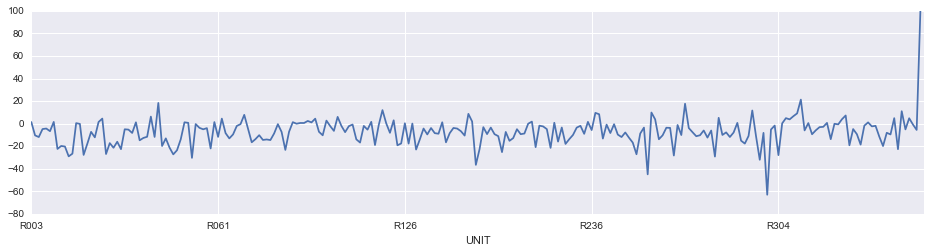

In [74]:
#diff_ridership.plot()



print(subway_df.columns)

plt.subplot(2,1,1)

diff_ridership_pct.plot(figsize=(16,8))


# plt.subplot(2,2,4)

# diff_ridership2.plot()

In [75]:
rain_correlations = subway_df.corr()['rain']

rain_correlations.sort_values(ascending=False)

rain               1.000000
meanprecipi        0.523850
precipi            0.331453
meanwspdi          0.214222
wspdi              0.151034
fog                0.144566
weekday            0.130846
ENTRIESn_hourly    0.025825
EXITSn_hourly      0.024134
latitude           0.003906
weather_lat        0.003483
longitude          0.000133
weather_lon        0.000122
hour              -0.000697
ENTRIESn          -0.002044
EXITSn            -0.003339
day_week          -0.082490
tempi             -0.263788
meantempi         -0.321441
pressurei         -0.349881
meanpressurei     -0.367976
Name: rain, dtype: float64

In [76]:
state_pcts = state_office.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))


NameError: name 'state_office' is not defined

In [ ]:

#causes error, commented out
#subway_df.groupby('precipi')['ENTRIESn_hourly','EXITSn_hourly'].hist(by='ENTRIESn_hourly')

In [78]:
subway_df.groupby('hour').agg('count')

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,day_week,weekday,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
hour,,,,,,,,,,,,,,,,,,,,,
0,7378,7378,7378,7378,7378,7378,7378,7378,7378,7378,...,7378,7378,7378,7378,7378,7378,7378,7378,7378,7378
4,7381,7381,7381,7381,7381,7381,7381,7381,7381,7381,...,7381,7381,7381,7381,7381,7381,7381,7381,7381,7381
8,5914,5914,5914,5914,5914,5914,5914,5914,5914,5914,...,5914,5914,5914,5914,5914,5914,5914,5914,5914,5914
12,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,...,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335
16,7298,7298,7298,7298,7298,7298,7298,7298,7298,7298,...,7298,7298,7298,7298,7298,7298,7298,7298,7298,7298
20,7343,7343,7343,7343,7343,7343,7343,7343,7343,7343,...,7343,7343,7343,7343,7343,7343,7343,7343,7343,7343


In [79]:
subway_df.groupby('hour')['ENTRIESn_hourly'].agg('count')

hour
0     7378
4     7381
8     5914
12    7335
16    7298
20    7343
Name: ENTRIESn_hourly, dtype: int64

In [80]:
subway_df[subway_df['DATEn'] == '2011-05-01'].head(4)
#In [7]: tips[tips['time'] == 'Dinner'].head(5)


,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon


In [81]:
subway_df['DATEn'] = pd.to_datetime(subway_df['DATEn'])



In [82]:
subway_df.dtypes

UNIT                       object
DATEn              datetime64[ns]
TIMEn                      object
ENTRIESn                    int64
EXITSn                      int64
ENTRIESn_hourly           float64
EXITSn_hourly             float64
datetime                   object
hour                        int64
day_week                    int64
weekday                     int64
station                    object
latitude                  float64
longitude                 float64
conds                      object
fog                         int64
precipi                   float64
pressurei                 float64
rain                        int64
tempi                     float64
wspdi                     float64
meanprecipi               float64
meanpressurei             float64
meantempi                 float64
meanwspdi                 float64
weather_lat               float64
weather_lon               float64
dtype: object

In [83]:
subway_df['DATEn'].iloc[1] #+ pd.Timedelta(days=1)

Timestamp('2011-05-01 00:00:00')

- How much does precipitation affect ridership?
- How does temperature affect ridership?
- Is there a threshold for temperature and/or precipitation where ridership is drastically increased?
- When adjusting for other variables, does wind still affect ridership?
- Are the results for the questions above consistent across all stations?

In [93]:
#Pandas tips & tricks
from IPython.display import display

#To do SQL IN style:

if False:
    print(subway_df.head(5))

    units = ['R003','R005','R006']

    display(subway_df.UNIT.isin(units).head(5))

    display(subway_df.UNIT[subway_df.UNIT.isin(units)].head(5))

    display(subway_df.UNIT[subway_df.UNIT.isin(units)].unique())